In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c0715edd67b749d9dc762444b9da3575fc0bd4d76c967b022848c65da0037092
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
import os
import pickle

In [ ]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/traffic-signs-data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall(path="/content/traffic-signs-data")

In [ ]:
TRAIN_FILE = "train.p"
VALID_FILE = "valid.p"
TEST_FILE = "test.p"

In [ ]:
def get_data(folder):
    # Load the dataset
    training_file = os.path.join(folder, TRAIN_FILE)
    validation_file= os.path.join(folder, VALID_FILE)
    testing_file =  os.path.join(folder, TEST_FILE)

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    # Retrive all datas
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
dataset = "traffic-signs-data"
X_train, y_train, X_valid, y_valid, X_test, y_test = get_data(dataset)

In [ ]:
# print(X_train)
print(y_train)

[41 41 41 ... 25 25 25]


In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

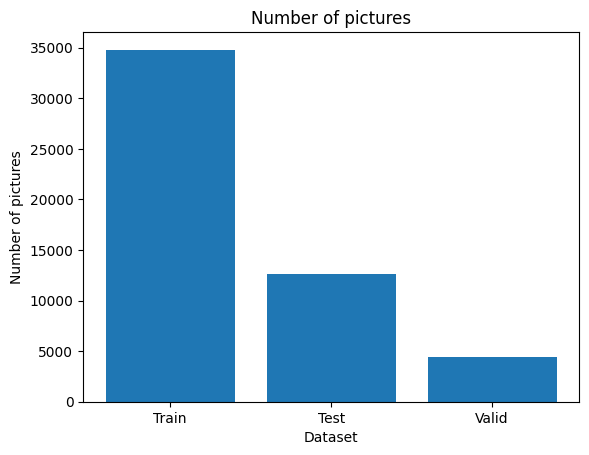

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(['Train', 'Test', 'Valid'], [len(X_train), len(X_test), len(X_valid)])
plt.xlabel('Dataset')
plt.ylabel('Number of pictures')
plt.title('Number of pictures')
plt.show()

Text(0.5, 1.0, 'X_test[0]')

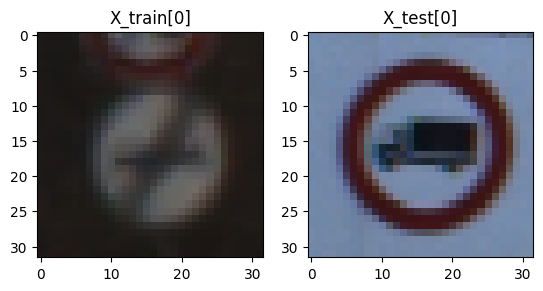

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title('X_train[0]')

plt.subplot(1, 2, 2)
plt.imshow(X_test[0])
plt.title('X_test[0]')

In [ ]:
# Normalize pixel values to between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

In [ ]:
IMG_SIZE = 32
X_train_reshape = X_train.reshape(X_train.shape[0], IMG_SIZE*IMG_SIZE*3)
X_test_reshape = X_test.reshape(X_test.shape[0], IMG_SIZE*IMG_SIZE*3)

In [ ]:
import sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
scores = []
confus = []

In [ ]:
alltrain = []
alltraintruth = []

In [ ]:
alltrain.append(X_train_reshape)
alltraintruth.append(y_train)

In [ ]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, n_jobs=-1,  max_depth = 20) # Change Forest parameters


In [ ]:
forest.fit(X_train_reshape, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_jobs=-1)

In [ ]:
print(X_train_reshape)

[[0.10980392 0.09803922 0.09411765 ... 0.10196078 0.08627451 0.07843137]
 [0.10980392 0.09411765 0.09411765 ... 0.11372549 0.10196078 0.09803922]
 [0.11372549 0.09803922 0.09803922 ... 0.11764706 0.10196078 0.09411765]
 ...
 [0.2        0.2627451  0.3372549  ... 0.1254902  0.14509804 0.18431373]
 [0.32156863 0.30588235 0.37647059 ... 0.16078431 0.16862745 0.20392157]
 [0.27058824 0.30980392 0.37647059 ... 0.22352941 0.26666667 0.31372549]]


In [ ]:
forest_predict = forest.predict(X_test_reshape)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
scores.append(forest.score(X_test_reshape,y_test))
confus.append(confusion_matrix(y_test, forest.predict(X_test_reshape)))

In [ ]:
print(scores)

[0.7569279493269992]


In [ ]:
forest_accuracy = accuracy_score(y_test, forest_predict)
forest_precision = precision_score(y_test, forest_predict, average = 'weighted')
forest_recall = recall_score(y_test, forest_predict, average = 'weighted')
forest_f1 = f1_score(y_test, forest_predict, average = 'weighted')

print(f"Accuracy: {forest_accuracy}")
print(f"Precision: {forest_precision}")
print(f"Recall: {forest_recall}")
print(f"F1 Score: {forest_f1}")

Accuracy: 0.7569279493269992
Precision: 0.7626697837297062
Recall: 0.7569279493269992
F1 Score: 0.7491878646859157


In [ ]:
for i in range(0,3):
  forest = RandomForestClassifier(criterion='entropy', n_estimators=100, n_jobs=-1,  max_depth = 20) # Change Forest parameters
  forest.fit(X_train_reshape, y_train)
  forest_predict = forest.predict(X_test_reshape)
  forest_accuracy = accuracy_score(y_test, forest_predict)
  forest_precision = precision_score(y_test, forest_predict, average = 'weighted')
  forest_recall = recall_score(y_test, forest_predict, average = 'weighted')
  forest_f1 = f1_score(y_test, forest_predict, average = 'weighted')

  print(f"Accuracy: {forest_accuracy}")
  print(f"Precision: {forest_precision}")
  print(f"Recall: {forest_recall}")
  print(f"F1 Score: {forest_f1}")

Accuracy: 0.759224069675376
Precision: 0.7662922366973792
Recall: 0.759224069675376
F1 Score: 0.752299357276147
Accuracy: 0.7570071258907364
Precision: 0.7668401001837565
Recall: 0.7570071258907364
F1 Score: 0.7508117763957917
Accuracy: 0.7614410134600158
Precision: 0.7710915436368643
Recall: 0.7614410134600158
F1 Score: 0.7556652436756578


mlp

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
model = MLPClassifier(random_state = 1, learning_rate_init=0.0003 ,max_iter=1000)
print(model)
print("Model Configured")

MLPClassifier(learning_rate_init=0.0003, max_iter=1000, random_state=1)
Model Configured


In [ ]:
model.fit(X_train_reshape, y_train)
print("Model Fitted")

Model Fitted


In [ ]:
y_pred = model.predict(X_test_reshape)

In [ ]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred, average = 'weighted')
model_recall = recall_score(y_test, y_pred, average = 'weighted')
model_f1 = f1_score(y_test, y_pred, average = 'weighted')

print(f"Accuracy: {model_accuracy}")
print(f"Precision: {model_precision}")
print(f"Recall: {model_recall}")
print(f"F1 Score: {model_f1}")

Accuracy: 0.8429928741092637
Precision: 0.8524123858313777
Recall: 0.8429928741092637
F1 Score: 0.8419104563553383
